# Self-Driving Car Engineer Nanodegree
# Behaviour Cloning

Project: Build a Traffic Sign Recognition Classifier
In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary.


---
## Step 0: Load The Data

IMG/center_2016_12_01_13_30_48_404.jpg
38
IMG/left_2016_12_01_13_30_48_404.jpg
36
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (80, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (80, 320, 3)


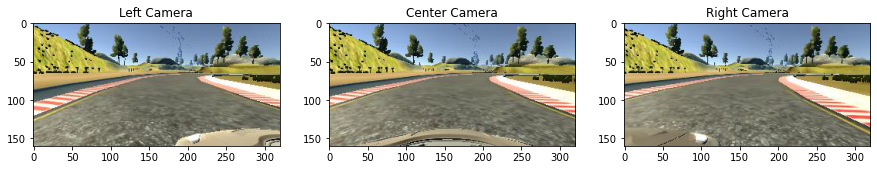

In [4]:
import os
import cv2
#import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from scipy.ndimage.filters import gaussian_filter
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"         # To use eGPU on MAC

Image_list = os.listdir("data/IMG/")
y_data_csv  = pd.read_csv('data/driving_log.csv')

print(y_data_csv['center'][1])
print(len(y_data_csv['center'][1]))
path = y_data_csv['left'][1][1:]

print(path)
print(len(path))

center_image = mpimg.imread('data/'+y_data_csv['center'][650])
print('This image is:', type(center_image), 'with dimensions:', center_image.shape)


crop_img = center_image[60:140,0:320] 
print('This image is:', type(crop_img), 'with dimensions:', crop_img.shape)

right_image = mpimg.imread('data/'+y_data_csv['right'][650][1:])
print('This image is:', type(right_image), 'with dimensions:', right_image.shape)

left_image = mpimg.imread('data/'+y_data_csv['left'][650][1:])
print('This image is:', type(left_image), 'with dimensions:', left_image.shape)

center_crop_img = center_image[60:140,0:320] 
print('This image is:', type(crop_img), 'with dimensions:', crop_img.shape)

flitp_imag = np.fliplr(center_image)

#blurred = skimage.filters.gaussian(center_image, sigma=(5, 5), truncate=3.5, multichannel=True)
# apply guassian blur on src image
blurred = cv2.GaussianBlur(center_image,(5,5),cv2.BORDER_DEFAULT)

fig, (ax1, ax2,ax3,) = plt.subplots(1,3, figsize=(15, 35))
ax1.imshow(left_image)
ax1.set_title('Left Camera')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(center_image)
ax2.set_title('Center Camera')    
ax2.axis('ON')  # clear x- and y-axes 
ax3.imshow(right_image)
ax3.set_title('Right Camera')    
ax3.axis('ON')  # clear x- and y-axes
plt.savefig("examples/LeftCenterRightImage.jpg", bbox_inches='tight')
plt.show()


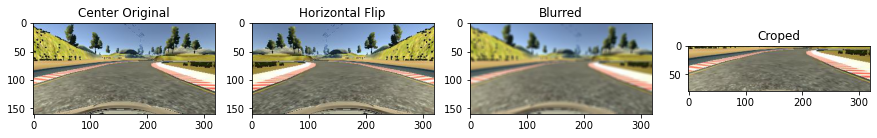

In [5]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15, 35))
ax1.imshow(center_image)
ax1.set_title('Center Original')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(flitp_imag)
ax2.set_title('Horizontal Flip')    
ax2.axis('ON')  # clear x- and y-axes 
ax3.imshow(blurred)
ax3.set_title('Blurred')    
ax3.axis('ON')  # clear x- and y-axes
ax4.imshow(center_crop_img)
ax4.set_title('Croped')    
ax4.axis('ON')  # clear x- and y-axes 
plt.savefig("examples/PreProcess.jpg", bbox_inches='tight')
plt.show()

In [2]:
X_data = []
y_data = []
 # create adjusted steering measurements for the side camera images
correction = 0.2
for row in range(len(y_data_csv)):
    X_data.append(mpimg.imread('data/'+y_data_csv['center'][row]))
    y_data.append(y_data_csv['steering'][row])
    X_data.append(mpimg.imread('data/'+y_data_csv['left'][row].strip()))   # strip() to delte space in the string
    y_data.append((y_data_csv['steering'][row])+correction)                       # Adding an offset for the not centered comera images
    X_data.append(mpimg.imread('data/'+y_data_csv['right'][row].strip())) 
    y_data.append((y_data_csv['steering'][row])-correction)                       # Added in the mathematical Therme
    
        
## Converting into np.Array for tensorflow        
X_data = np.array(X_data)
y_data = np.array(y_data)

### Flip the imge

In [3]:
# Flipping Dataset
X_flip = []
y_flip = []

X_flip = np.fliplr(X_data)
y_flip = -y_data
## Converting into np.Array for tensorflow
X_flip = np.array(X_flip)
y_flip = np.array(y_flip)

#Bluring: apply guassian blur
X_blur = []
y_blur = []
for i in range(len(X_data)):
    X_blur.append(cv2.GaussianBlur(X_data[i],(5,5),cv2.BORDER_DEFAULT))
    y_blur.append((y_data[i]))
    
# Converting into np.Array for tensorflow
X_blur = np.array(X_blur)
y_blur = np.array(y_blur)

In [4]:
### Combining the datasets

#Extend first the flipped images
np.concatenate(X_data, X_flip)
#np.append(y_data, y_flip)
#Extend second the blured images
#X_data.append(X_blur)
#y_data.append(X_blur)

TypeError: only integer scalar arrays can be converted to a scalar index

## Check if the data sets coherent

In [ ]:
assert(len(X_data) == len(y_data))


# Step 1: Dataset Summary & Exploration

Provide a Basic Summary of the Data Set
---

In [ ]:
import pandas as pd

# Number of training examples
n_train = len(X_data)

# Number of training lables
n_y_train = len(y_data)

# Number of validation examples
#n_validation = X_valid.shape[0]

# Number of validation lables
#n_y_validation = y_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_data[1].shape

print("Number of training samples =", n_train)
print("Number of training labels =", n_y_train)#
#print("Number of validation samples =", n_validat#ion)
#print("Number of validation labels =", n_y_validation)
print("Image data shape =", image_shape[0],image_shape[1],image_shape[2])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### Normalization of the Data

In [ ]:


# No need - Is done in the layers

#for i in range(len(X_data)):
#    X_data[i] = cv2.normalize(X_data[i],None,0,128,cv2.NORM_MINMAX) #normalizeFunction istheproble
    
#for i in range(len(X_valid)):
 #   X_valid[i] = cv2.normalize(X_valid[i],None,0,128,cv2.NORM_MINMAX) #normalizeFunction istheproble

### Model Architecture

---

#### Setup Keras

The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.
You do not need to modify this section.

In [ ]:
import tensorflow as tf
#EPOCHS = 3
#BATCH_SIZE = 512

In [ ]:
# Setup Keras

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"         # To use eGPU on MAC

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Lambda, Cropping2D
from keras.optimizers import Adam


#### Implement CNN architecture

In [ ]:
# Build the Final Test Neural Network in Keras Here
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160, 320, 3)))     # normalization
model.add(Cropping2D(cropping=((50,20),(0,0))))

model.add(Conv2D(3,  (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(48, (3, 3),                 activation='relu'))
model.add(Conv2D(64, (3, 3),                 activation='relu'))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,                    ))


In [ ]:
# compile and fit model
#callbacks = EarlyStopping( monitor='val_loss',min_delta=0, mode='auto', restore_best_weights=True, patience=2)
optimizer = Adam(lr=0.001)
model.compile( optimizer=optimizer, loss="mse") #metrics=[tf.keras.metrics.Accuracy()
history = model.fit(X_data,y_data,batch_size = 1024, validation_split=0.2, shuffle=True, epochs=7) #commded out callbacks = [callbacks]


In [ ]:
for key in history.history.keys():
    plt.clf()
    plt.plot(history.history[key])
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.show()

In [ ]:
#save the model
model.save('model.h5')